In [1]:
import numpy as np
import math

import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker
import matplotlib.gridspec as gridspec
import seaborn as sns

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

from IPython.display import Image

from tqdm import tqdm
import os 

In [2]:
Years = ["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009"]

Months = []
for imon in range(1,13): ### shw
    Months.append(str(imon).zfill(2))
    
Days = []
for iday in range(1,30,3):
    Days.append(str(iday).zfill(2))
    
print(Years)
print(Months)
print(Days)

['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
['01', '04', '07', '10', '13', '16', '19', '22', '25', '28']


In [3]:
Pressure = [100, 75, 65, 55, 47, 40, 30] # hPa
Height   = [16,  17.92, 18.87, 20, 21.05, 22.1, 24] # km

Season = ["Winter", "Spring", "Summer", "Autumn"]

In [4]:
N_head = 5 # first 5 lines are head lines, not include data
N_column = 4 + 2

# Nx = 36
# Ny = 21
# Nz = 5
# N_parcel = 3780

Nx = 24
Ny = 21
Nz = 6+1
N_parcel = Nx*Ny*Nz

# if Nx*Ny*Nz!=N_parcel: print('ERROR: parcel number is wrong!')
    

N_year  = len(Years)
N_month = len(Months)
N_day   = len(Days)


lifetime   = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_N = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_S = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
Lon = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
Lat = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
Lev = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

print(lifetime.shape)


Nz1 = 6
lifetime1   = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year))
lifetime1_N = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year))
lifetime1_S = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year))
Lon1 = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year))
Lat1 = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year))
Lev1 = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year)) 


Nz2 = 1
lifetime2   = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year))
lifetime2_N = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year))
lifetime2_S = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year))
Lon2 = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year))
Lat2 = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year))
Lev2 = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year)) 

if Nz!=(Nz1+Nz2): print("Error: Nz=Nz1+Nz2!!!")

(7, 21, 24, 10, 12, 10)


In [5]:
# for first 6 altitude injections

directory1 = '../Lifetime/'
filename1 = "Lifetime_"+Years[0]+Months[0]+Days[0]+".txt"
print(directory1+filename1)


for i_year in range(N_year):
    for i_month in tqdm(range(N_month)):
        for i_day in range(N_day):
            filename1 = "Lifetime_"+Years[i_year]+Months[i_month]+Days[i_day]+".txt"
            File1 = open(directory1+filename1, 'r')
        
            Lines1 = File1.readlines()

            # Strips the newline character
            data = []
            data_N = []
            data_S = []
            data_x = []
            data_y = []
            data_z = []
            for line1 in Lines1:
                a = line1.split(',')
                data.append(float(a[0])) # total lifetime
                data_N.append(float(a[1])) # total N lifetime
                data_S.append(float(a[2])) # total S lifetime
                data_x.append(float(a[3])) # lon
                data_y.append(float(a[4])) # lat
                data_z.append(float(a[5])) # p
    
            i = 0
            for ix in range(Nx):
                for iy in range(Ny):
                    for iz in range(Nz1):
                        lifetime1[iz,iy,ix,i_day,i_month,i_year]   = data[i]
                        lifetime1_N[iz,iy,ix,i_day,i_month,i_year] = data_N[i]
                        lifetime1_S[iz,iy,ix,i_day,i_month,i_year] = data_S[i]
                        Lon1[iz,iy,ix,i_day,i_month,i_year] = data_x[i]
                        Lat1[iz,iy,ix,i_day,i_month,i_year] = data_y[i]
                        Lev1[iz,iy,ix,i_day,i_month,i_year] = data_z[i]

                        i = i+1
                        

  0%|          | 0/12 [00:00<?, ?it/s]

../Lifetime/Lifetime_20000101.txt


100%|██████████| 12/12 [00:07<00:00,  1.65it/s]


In [6]:
# for 21-km injection

directory2 = '../21km_post_process/Lifetime_21km/'
filename2 = "Lifetime_"+Years[0]+Months[0]+Days[0]+"_21km.txt"
print(directory2+filename2)


for i_year in range(N_year):
    for i_month in tqdm(range(N_month)):
        for i_day in range(N_day):
            filename2 = "Lifetime_"+Years[i_year]+Months[i_month]+Days[i_day]+"_21km.txt"
            File2 = open(directory2+filename2, 'r')
        
            Lines2 = File2.readlines()

            # Strips the newline character
            data = []
            data_N = []
            data_S = []
            data_x = []
            data_y = []
            data_z = []
            for line2 in Lines2:
                a = line2.split(',')
                data.append(float(a[0])) # total lifetime
                data_N.append(float(a[1])) # total N lifetime
                data_S.append(float(a[2])) # total S lifetime
                data_x.append(float(a[3])) # lon
                data_y.append(float(a[4])) # lat
                data_z.append(float(a[5])) # p
    
            i = 0
            for ix in range(Nx):
                for iy in range(Ny):
                    for iz in range(Nz2):
                        lifetime2[iz,iy,ix,i_day,i_month,i_year]   = data[i]
                        lifetime2_N[iz,iy,ix,i_day,i_month,i_year] = data_N[i]
                        lifetime2_S[iz,iy,ix,i_day,i_month,i_year] = data_S[i]
                        Lon2[iz,iy,ix,i_day,i_month,i_year] = data_x[i]
                        Lat2[iz,iy,ix,i_day,i_month,i_year] = data_y[i]
                        Lev2[iz,iy,ix,i_day,i_month,i_year] = data_z[i]

                        i = i+1

  0%|          | 0/12 [00:00<?, ?it/s]

../21km_post_process/Lifetime_21km/Lifetime_20000101_21km.txt


100%|██████████| 12/12 [00:02<00:00,  4.24it/s]


In [7]:
# Combine (1) 6 altitude injections and (2) 21-km injection

# Pressure = [100, 75, 65, 55, 47, 40, 30] # hPa
# Height   = [16,  18, 19, 20, 21, 22, 24] # km

lifetime[0:4,:,:,:,:,:]   = lifetime1[0:4,:,:,:,:,:]
lifetime_N[0:4,:,:,:,:,:] = lifetime1_N[0:4,:,:,:,:,:]
lifetime_S[0:4,:,:,:,:,:] = lifetime1_S[0:4,:,:,:,:,:]
Lon[0:4,:,:,:,:,:] = Lon1[0:4,:,:,:,:,:]
Lat[0:4,:,:,:,:,:] = Lat1[0:4,:,:,:,:,:]
Lev[0:4,:,:,:,:,:] = Lev1[0:4,:,:,:,:,:]

# 21-km
lifetime[4,:,:,:,:,:]   = lifetime2[0,:,:,:,:,:]
lifetime_N[4,:,:,:,:,:] = lifetime2_N[0,:,:,:,:,:]
lifetime_S[4,:,:,:,:,:] = lifetime2_S[0,:,:,:,:,:]
Lon[4,:,:,:,:,:] = Lon2[0,:,:,:,:,:]
Lat[4,:,:,:,:,:] = Lat2[0,:,:,:,:,:]
Lev[4,:,:,:,:,:] = Lev2[0,:,:,:,:,:]


lifetime[5:7,:,:,:,:,:]   = lifetime1[4:6,:,:,:,:,:]
lifetime_N[5:7,:,:,:,:,:] = lifetime1_N[4:6,:,:,:,:,:]
lifetime_S[5:7,:,:,:,:,:] = lifetime1_S[4:6,:,:,:,:,:]
Lon[5:7,:,:,:,:,:] = Lon1[4:6,:,:,:,:,:]
Lat[5:7,:,:,:,:,:] = Lat1[4:6,:,:,:,:,:]
Lev[5:7,:,:,:,:,:] = Lev1[4:6,:,:,:,:,:]

### Change the Lon and Lat order, and change the lifetime data order in corresponding to the Lon/Lat order

In [8]:
LON_1d = Lon[0,0,:,0,0,0]
LAT_1d = Lat[0,:,0,0,0,0]

In [9]:
# First for LON: change (0,360) to (-180,180)

#################
# correst method 1:
#################
# lifetime_season_mean_new = np.zeros((Nz, Ny, Nx, N_season))
# lifetime_N_season_mean_new = np.zeros((Nz, Ny, Nx, N_season))
# lifetime_S_season_mean_new = np.zeros((Nz, Ny, Nx, N_season))

lifetime_new = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_N_new = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_S_new = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))


print("LON Before: ", LON_1d)

for i in range(len(LON_1d)):
    if LON_1d[i]>=180: LON_1d[i] = LON_1d[i]-360

# sort
idx = np.argsort(LON_1d)
# print(idx)

LON_1d = LON_1d[idx]

Lon_new = Lon[:,:,idx,:,:,:]
Lat_new = Lat
# lifetime_season_mean_new = lifetime_season_mean[:,:,idx,:]
# lifetime_N_season_mean_new = lifetime_N_season_mean[:,:,idx,:]
# lifetime_S_season_mean_new = lifetime_S_season_mean[:,:,idx,:]

lifetime_new = lifetime[:,:,idx,:,:,:]
lifetime_N_new = lifetime_N[:,:,idx,:,:,:]
lifetime_S_new = lifetime_S[:,:,idx,:,:,:]

print("LON After: ", LON_1d)

print("")
print(lifetime_new.shape)


# #################
# # wrong method 2:
# #################

# lifetime_new = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
# lifetime_N_new = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
# lifetime_S_new = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

# LON_1d = LON_1d - 180 ### shw ???


# Lon_new = Lon - 180
# Lat_new = Lat

# lifetime_new = lifetime[:,:,:,:,:,:]
# lifetime_N_new = lifetime_N[:,:,:,:,:,:]
# lifetime_S_new = lifetime_S[:,:,:,:,:,:]

LON Before:  [  0.  15.  30.  45.  60.  75.  90. 105. 120. 135. 150. 165. 180. 195.
 210. 225. 240. 255. 270. 285. 300. 315. 330. 345.]
LON After:  [-180. -165. -150. -135. -120. -105.  -90.  -75.  -60.  -45.  -30.  -15.
    0.   15.   30.   45.   60.   75.   90.  105.  120.  135.  150.  165.]

(7, 21, 24, 10, 12, 10)


In [10]:
# Second for LAT: change (-20,20) to (20,-20)

Lon_new2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
Lat_new2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

lifetime_new2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_N_new2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_S_new2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))


print("LAT Before: ", LAT_1d)
LAT_1d = LAT_1d[::-1]
print("LAT After: ", LAT_1d)

Lon_new2 = Lon_new[:,::-1,:,:,:,:]
Lat_new2 = Lat_new[:,::-1,:,:,:,:]

lifetime_new2 = lifetime_new[:,::-1,:,:,:,:]
lifetime_N_new2 = lifetime_N_new[:,::-1,:,:,:,:]
lifetime_S_new2 = lifetime_S_new[:,::-1,:,:,:,:]

print("")
print(lifetime_new.shape)

LAT Before:  [-30. -27. -24. -21. -18. -15. -12.  -9.  -6.  -3.   0.   3.   6.   9.
  12.  15.  18.  21.  24.  27.  30.]
LAT After:  [ 30.  27.  24.  21.  18.  15.  12.   9.   6.   3.   0.  -3.  -6.  -9.
 -12. -15. -18. -21. -24. -27. -30.]

(7, 21, 24, 10, 12, 10)


## Seasonal mean

In [11]:


# lifetime(Nz, Ny, Nx, N_day, N_month, N_year)

lifetime_mon = np.mean(lifetime_new, axis=(3,5))
lifetime_N_mon = np.mean(lifetime_N_new, axis=(3,5))
lifetime_S_mon = np.mean(lifetime_S_new, axis=(3,5))


# lifetime_mon(Nz, Ny, Nx, N_month)
N_season = 4

lifetime_season = np.zeros((Nz, Ny, Nx, N_season))
lifetime_N_season = np.zeros((Nz, Ny, Nx, N_season))
lifetime_S_season = np.zeros((Nz, Ny, Nx, N_season))


# for Winter
lifetime_season[:,:,:,0]   = np.mean(lifetime_mon[:,:,:,[0,1,11]], axis=3)
lifetime_N_season[:,:,:,0] = np.mean(lifetime_N_mon[:,:,:,[0,1,11]], axis=3)
lifetime_S_season[:,:,:,0] = np.mean(lifetime_S_mon[:,:,:,[0,1,11]], axis=3)
    
# for Spring, Summer and Autumn
for i in range(1,N_season):
    print(i,i*3-1,(i+1)*3-1)
    lifetime_season[:,:,:,i]   = np.mean(  lifetime_mon[:,:,:,i*3-1:(i+1)*3-1], axis=3)
    lifetime_N_season[:,:,:,i] = np.mean(lifetime_N_mon[:,:,:,i*3-1:(i+1)*3-1], axis=3)
    lifetime_S_season[:,:,:,i] = np.mean(lifetime_S_mon[:,:,:,i*3-1:(i+1)*3-1], axis=3)
    
lifetime_season.shape

1 2 5
2 5 8
3 8 11


(7, 21, 24, 4)

In [12]:
# used to calculate std, time series of all seasons

# monthly mean data
# lifetime(Nz, Ny, Nx, N_day, N_month, N_year)
lifetime_mons = np.mean(lifetime_new, axis=(3))   # lifetime_mon(Nz, Ny, Nx, N_month, N_year)
lifetime_N_mons = np.mean(lifetime_N_new, axis=(3))
lifetime_S_mons = np.mean(lifetime_S_new, axis=(3))

# seasonal mean data: winter => spring => summer => autumn
N_Seasons = 4

lifetime_Seasons   = np.zeros((Nz, Ny, Nx, N_Seasons, N_year))
lifetime_N_Seasons = np.zeros((Nz, Ny, Nx, N_Seasons, N_year))
lifetime_S_Seasons = np.zeros((Nz, Ny, Nx, N_Seasons, N_year))


i_year = 0
i_month = 0
for i_year in range(N_year):
    for i_season in range(N_Seasons):
        
        # winter
        if i_season==0:
            if i_year==0:
                lifetime_Seasons[:,:,:,i_season,i_year]   = np.mean(lifetime_mons[:,:,:,[0,1],i_year], axis=3)
                lifetime_N_Seasons[:,:,:,i_season,i_year] = np.mean(lifetime_N_mons[:,:,:,[0,1],i_year], axis=3)
                lifetime_S_Seasons[:,:,:,i_season,i_year] = np.mean(lifetime_S_mons[:,:,:,[0,1],i_year], axis=3)  
            else:
                lifetime_Seasons[:,:,:,i_season,i_year]   = ( lifetime_mons[:,:,:,11,i_year-1] \
                                                            +lifetime_mons[:,:,:,0,i_year]    \
                                                            +lifetime_mons[:,:,:,1,i_year]) / 3.0
                lifetime_N_Seasons[:,:,:,i_season,i_year] = ( lifetime_N_mons[:,:,:,11,i_year-1] \
                                                            +lifetime_N_mons[:,:,:,0,i_year]    \
                                                            +lifetime_N_mons[:,:,:,1,i_year]) / 3.0
                lifetime_S_Seasons[:,:,:,i_season,i_year] = ( lifetime_S_mons[:,:,:,11,i_year-1] \
                                                            +lifetime_S_mons[:,:,:,0,i_year]    \
                                                            +lifetime_S_mons[:,:,:,1,i_year]) / 3.0

        # spring
        if i_season==1:
            lifetime_Seasons[:,:,:,i_season,i_year]   = np.mean(lifetime_mons[:,:,:,[2,3,4],i_year], axis=3)
            lifetime_N_Seasons[:,:,:,i_season,i_year] = np.mean(lifetime_N_mons[:,:,:,[2,3,4],i_year], axis=3)
            lifetime_S_Seasons[:,:,:,i_season,i_year] = np.mean(lifetime_S_mons[:,:,:,[2,3,4],i_year], axis=3)
   
        # summer
        if i_season==2:
            lifetime_Seasons[:,:,:,i_season,i_year]   = np.mean(lifetime_mons[:,:,:,[5,6,7],i_year], axis=3)
            lifetime_N_Seasons[:,:,:,i_season,i_year] = np.mean(lifetime_N_mons[:,:,:,[5,6,7],i_year], axis=3)
            lifetime_S_Seasons[:,:,:,i_season,i_year] = np.mean(lifetime_S_mons[:,:,:,[5,6,7],i_year], axis=3)
            
        # autumn
        if i_season==3:
            lifetime_Seasons[:,:,:,i_season,i_year]   = np.mean(lifetime_mons[:,:,:,[8,9,10],i_year], axis=3)
            lifetime_N_Seasons[:,:,:,i_season,i_year] = np.mean(lifetime_N_mons[:,:,:,[8,9,10],i_year], axis=3)
            lifetime_S_Seasons[:,:,:,i_season,i_year] = np.mean(lifetime_S_mons[:,:,:,[8,9,10],i_year], axis=3)

# std
lifetime_uni_series = np.zeros((Nz, N_Seasons, N_year))
lifetime_LP_series  = np.zeros((Nz, N_Seasons, N_year))
lifetime_Y_series   = np.zeros((Nz, N_Seasons, N_year))
lifetime_XY_series  = np.zeros((Nz, N_Seasons, N_year))

lifetime_uni_mean = np.zeros((Nz))
lifetime_LP_mean  = np.zeros((Nz))
lifetime_Y_mean   = np.zeros((Nz))
lifetime_XY_mean  = np.zeros((Nz))

lifetime_uni_std = np.zeros((Nz))
lifetime_LP_std  = np.zeros((Nz))
lifetime_Y_std   = np.zeros((Nz))
lifetime_XY_std  = np.zeros((Nz))

lifetime_uni_med = np.zeros((Nz))
lifetime_LP_med  = np.zeros((Nz))
lifetime_Y_med   = np.zeros((Nz))
lifetime_XY_med  = np.zeros((Nz))

lifetime_uni_25th = np.zeros((Nz))
lifetime_LP_25th  = np.zeros((Nz))
lifetime_Y_25th   = np.zeros((Nz))
lifetime_XY_25th  = np.zeros((Nz))

lifetime_uni_75th = np.zeros((Nz))
lifetime_LP_75th  = np.zeros((Nz))
lifetime_Y_75th   = np.zeros((Nz))
lifetime_XY_75th  = np.zeros((Nz))

## Strategy_Uni

In [13]:
Inject_Percent_Uni = np.zeros((Nz, Ny, Nx, N_season))
Inject_Percent_Uni[:,:,:,:] = 1/(Nx*Ny)*100 # (unit: %)

D_lifetime_uniform = lifetime_N_season[:,:,:,:] - lifetime_S_season[:,:,:,:]

# lifetime_Seasons   = np.zeros((Nz, Ny, Nx, N_Seasons, N_year))
lifetime_uni_series[:,:,:] = np.mean(lifetime_Seasons[:,:,:,:,:],axis=(1,2))

lifetime_uni_std[:] = np.std(lifetime_uni_series, axis=(1,2))
lifetime_uni_mean[:] = np.mean(lifetime_uni_series, axis=(1,2))
lifetime_uni_med[:] = np.median(lifetime_uni_series, axis=(1,2))
lifetime_uni_25th[:] = np.percentile(lifetime_uni_series, 25, axis=(1,2)) # np.percentile(a, 50, axis=0)
lifetime_uni_75th[:] = np.percentile(lifetime_uni_series, 75, axis=(1,2))

lifetime_uni_std  = lifetime_uni_std/365
lifetime_uni_mean = lifetime_uni_mean/365
lifetime_uni_med  = lifetime_uni_med/365
lifetime_uni_25th  = lifetime_uni_25th/365
lifetime_uni_75th  = lifetime_uni_75th/365

print(lifetime_uni_mean)
print(lifetime_uni_std)
print(Height)

[0.40438449 1.19274649 1.62219686 2.05327546 2.31070967 2.4460597
 2.56434226]
[0.0687161  0.07489188 0.08204763 0.06202397 0.06285833 0.07673489
 0.09492753]
[16, 17.92, 18.87, 20, 21.05, 22.1, 24]


In [14]:
lifetime_year = np.mean(lifetime_uni_series, axis=1)

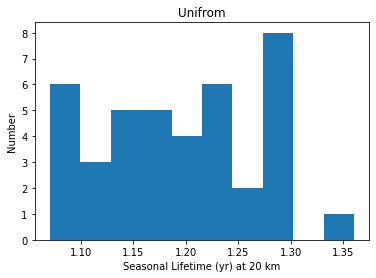

In [15]:
# data = np.mean(lifetime_uni_series[2,:,:], axis=0)
data = lifetime_uni_series[1,:,:].flatten()

plt.hist( data/365.25 )
# plt.ylim(0,40)
plt.xlabel("Seasonal Lifetime (yr) at 20 km")
plt.ylabel("Number")
plt.title('Unifrom');

In [16]:
lifetime_uni_series.shape

(7, 4, 10)

50 49
20160
2.066326530612245
0.20029761904761906
0.5048611111111111


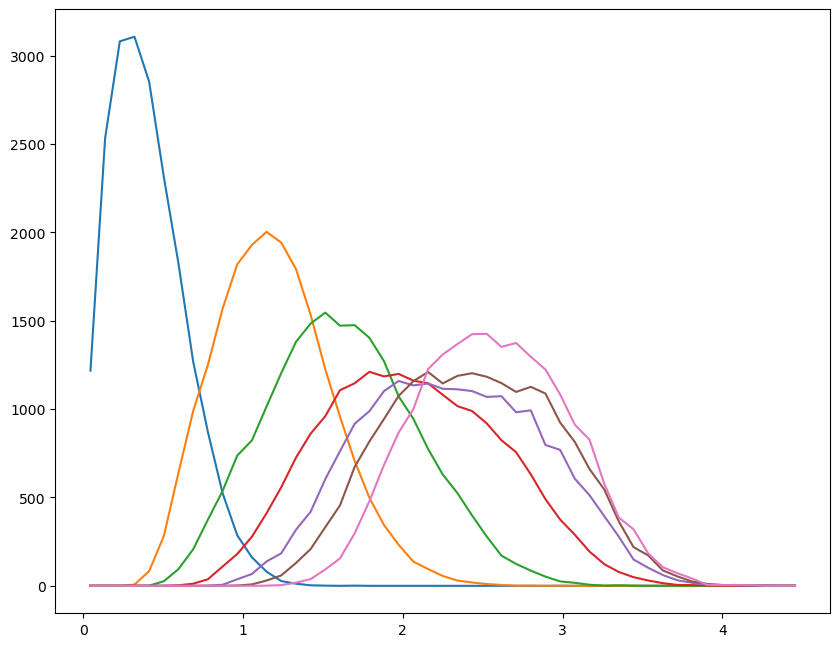

In [17]:
fig = plt.figure(figsize=(10,8), dpi=100)

data1 = lifetime_Seasons[0,:,:,:,:].flatten()/365.25
data2 = lifetime_Seasons[1,:,:,:,:].flatten()/365.25
data3 = lifetime_Seasons[2,:,:,:,:].flatten()/365.25
data4 = lifetime_Seasons[3,:,:,:,:].flatten()/365.25
data5 = lifetime_Seasons[4,:,:,:,:].flatten()/365.25
data6 = lifetime_Seasons[5,:,:,:,:].flatten()/365.25
data7 = lifetime_Seasons[6,:,:,:,:].flatten()/365.25


Xbin = np.linspace(0,4.5,50)
Xbin_mid = ( Xbin[0:len(Xbin)-1] + Xbin[1:len(Xbin)] ) /2

Num_data1, Xbin_new = np.histogram(data1, bins=Xbin)
Num_data2, Xbin_new = np.histogram(data2, bins=Xbin)
Num_data3, Xbin_new = np.histogram(data3, bins=Xbin)
Num_data4, Xbin_new = np.histogram(data4, bins=Xbin)
Num_data5, Xbin_new = np.histogram(data5, bins=Xbin)
Num_data6, Xbin_new = np.histogram(data6, bins=Xbin)
Num_data7, Xbin_new = np.histogram(data7, bins=Xbin)

print(len(Xbin), len(Num_data1))
print(len(data1))

plt.plot(Xbin_mid, Num_data1)
plt.plot(Xbin_mid, Num_data2)
plt.plot(Xbin_mid, Num_data3)
plt.plot(Xbin_mid, Num_data4)
plt.plot(Xbin_mid, Num_data5)
plt.plot(Xbin_mid, Num_data6)
plt.plot(Xbin_mid, Num_data7)

print(Xbin_mid[22])
print(sum(Num_data3[22::])/len(data1))
print(sum(Num_data4[22::])/len(data1))

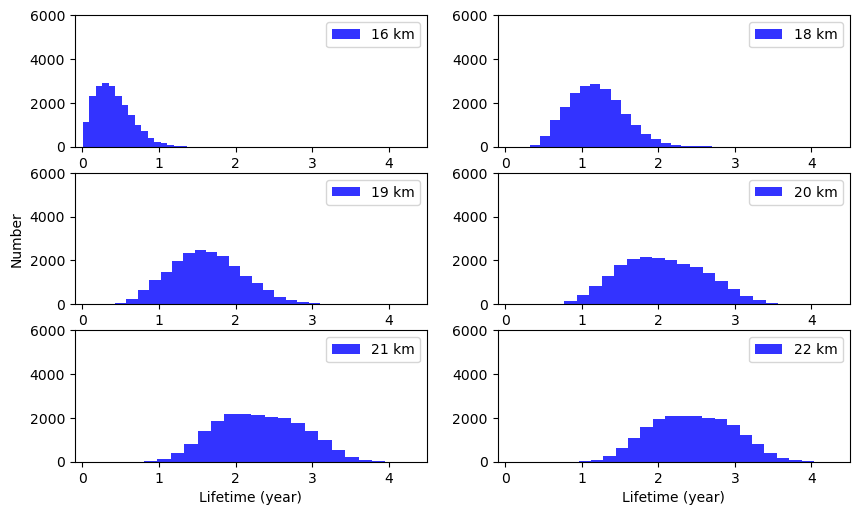

In [18]:
fig = plt.figure(figsize=(10,8), dpi=100)

data1 = lifetime_Seasons[0,:,:,:,:].flatten()
data2 = lifetime_Seasons[1,:,:,:,:].flatten()
data3 = lifetime_Seasons[2,:,:,:,:].flatten()
data4 = lifetime_Seasons[3,:,:,:,:].flatten()
data5 = lifetime_Seasons[4,:,:,:,:].flatten()
data6 = lifetime_Seasons[5,:,:,:,:].flatten()
data7 = lifetime_Seasons[6,:,:,:,:].flatten()


Xbin = np.linspace(0,4.5,20)

data11 = np.mean(lifetime_Seasons[0,:,:,:,:], axis=(2,3)).flatten()
data22 = np.mean(lifetime_Seasons[1,:,:,:,:], axis=(2,3)).flatten()
data33 = np.mean(lifetime_Seasons[2,:,:,:,:], axis=(2,3)).flatten()
data44 = np.mean(lifetime_Seasons[3,:,:,:,:], axis=(2,3)).flatten()
data55 = np.mean(lifetime_Seasons[4,:,:,:,:], axis=(2,3)).flatten()
data66 = np.mean(lifetime_Seasons[5,:,:,:,:], axis=(2,3)).flatten()
data77 = np.mean(lifetime_Seasons[6,:,:,:,:], axis=(2,3)).flatten()

###
ax1 = fig.add_subplot(4,2,1)

ax1.hist( data1/365.25, bins=20, alpha=0.8, color = 'b', label=f'{Height[0]:.0f} km')
# ax1.hist( data2/365.25, alpha=0.1, color = 'y', label=f'{Height[1]:.0f} km')

ax1.set_xlim(-0.1,4.5)
ax1.set_ylim(0,6000)
ax1.legend(loc='upper right')

###
ax2 = fig.add_subplot(4,2,2)

ax2.hist( data2/365.25, bins=20, alpha=0.8, color = 'b', label=f'{Height[1]:.0f} km')
# ax2.hist( data3/365.25, alpha=0.1, color = 'y', label=f'{Height[2]:.0f} km')

ax2.set_xlim(-0.1,4.5)
ax2.set_ylim(0,6000)
ax2.legend(loc='upper right')

###
ax3 = fig.add_subplot(4,2,3)

ax3.hist( data3/365.25, bins=20, alpha=0.8, color = 'b', label=f'{Height[2]:.0f} km')
# ax3.hist( data4/365.25, alpha=0.1, color = 'y', label=f'{Height[3]:.0f} km')

ax3.set_xlim(-0.1,4.5)
ax3.set_ylim(0,6000)
ax3.legend(loc='upper right')
ax3.set_ylabel("Number")

###
ax4 = fig.add_subplot(4,2,4)

ax4.hist( data4/365.25, bins=20, alpha=0.8, color = 'b', label=f'{Height[3]:.0f} km')
# ax4.hist( data5/365.25, alpha=0.1, color = 'y', label=f'{Height[4]:.0f} km')

ax4.set_xlim(-0.1,4.5)
ax4.set_ylim(0,6000)
ax4.legend(loc='upper right')

###
ax5 = fig.add_subplot(4,2,5)

ax5.hist( data5/365.25, bins=20, alpha=0.8, color = 'b', label=f'{Height[4]:.0f} km')
# ax5.hist( data6/365.25, alpha=0.1, color = 'y', label=f'{Height[5]:.0f} km')

ax5.set_xlim(-0.1,4.5)
ax5.set_ylim(0,6000)
ax5.legend(loc='upper right')
ax5.set_xlabel("Lifetime (year)")

###
ax6 = fig.add_subplot(4,2,6)

ax6.hist( data6/365.25, bins=20, alpha=0.8, color = 'b', label=f'{Height[5]:.0f} km')
# ax6.hist( data7/365.25, alpha=0.2, color = 'y', label=f'{Height[6]:.0f} km')

ax6.set_xlim(-0.1,4.5)
ax6.set_ylim(0,6000)
ax6.legend(loc='upper right')
ax6.set_xlabel("Lifetime (year)");

# ###
# ax7 = fig.add_subplot(8,2,7)

# ax7.hist( data6/365.25, alpha=0.8, color = 'b', label=f'{Height[5]:.0f} km')
# ax7.hist( data7/365.25, alpha=0.4, color = 'y', label=f'{Height[6]:.0f} km')

# ax7.legend()

# ###
# ax8 = fig.add_subplot(8,2,8)

# ax8.hist( data1/365.25, alpha=0.4)
# ax8.hist( data2/365.25, alpha=0.4)
# ax8.hist( data3/365.25, alpha=0.4)
# ax8.hist( data4/365.25, alpha=0.4)
# ax8.hist( data5/365.25, alpha=0.4)
# ax8.hist( data6/365.25, alpha=0.4)
# ax8.hist( data7/365.25, alpha=0.4);


# # plt.ylim(0,40)
# plt.xlabel("Seasonal Lifetime (yr) at 20 km")
# plt.ylabel("Number")
# plt.title('Unifrom');

/n/home12/hongwei/.conda/envs/SUNenv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/n/home12/hongwei/.conda/envs/SUNenv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/n/home12/hongwei/.conda/envs/SUNenv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

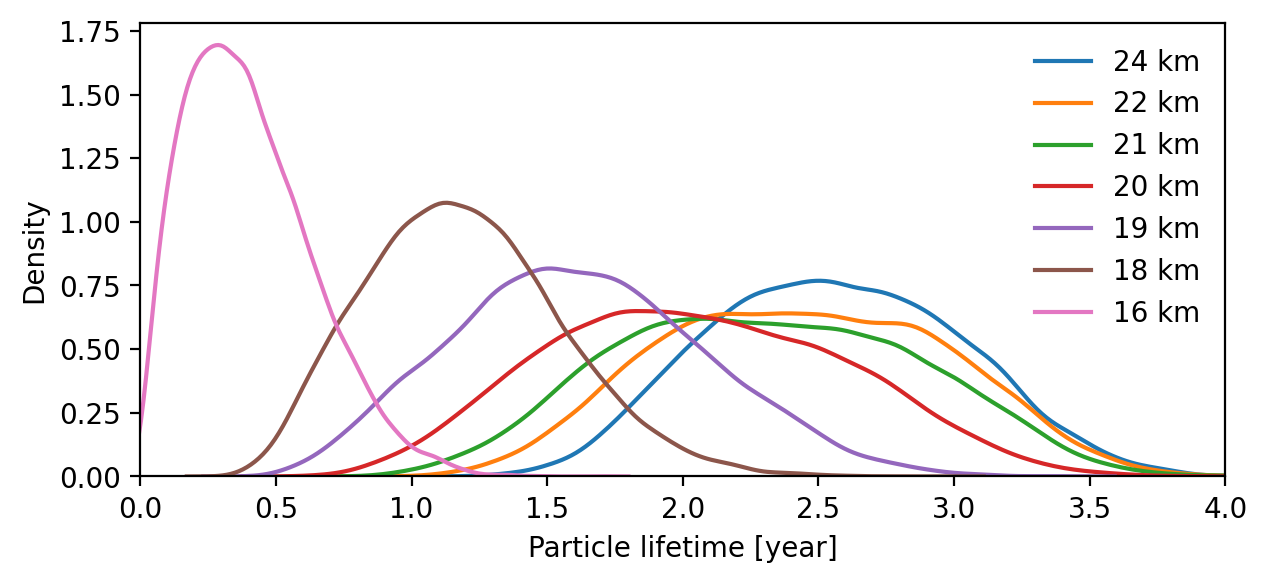

In [19]:
fig = plt.figure(figsize=(7,3), dpi=200)

sns.distplot(data7/365.25, kde=True, hist = False, label='24 km')
sns.distplot(data6/365.25, kde=True, hist = False, label='22 km')
sns.distplot(data5/365.25, kde=True, hist = False, label='21 km')
sns.distplot(data4/365.25, kde=True, hist = False, label='20 km')
sns.distplot(data3/365.25, kde=True, hist = False, label='19 km')
sns.distplot(data2/365.25, kde=True, hist = False, label='18 km')
sns.distplot(data1/365.25, kde=True, hist = False, label='16 km')

plt.xlim(0,4)
plt.xlabel("Particle lifetime [year]")

plt.legend(frameon=False)

/n/home12/hongwei/.conda/envs/SUNenv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/n/home12/hongwei/.conda/envs/SUNenv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/n/home12/hongwei/.conda/envs/SUNenv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

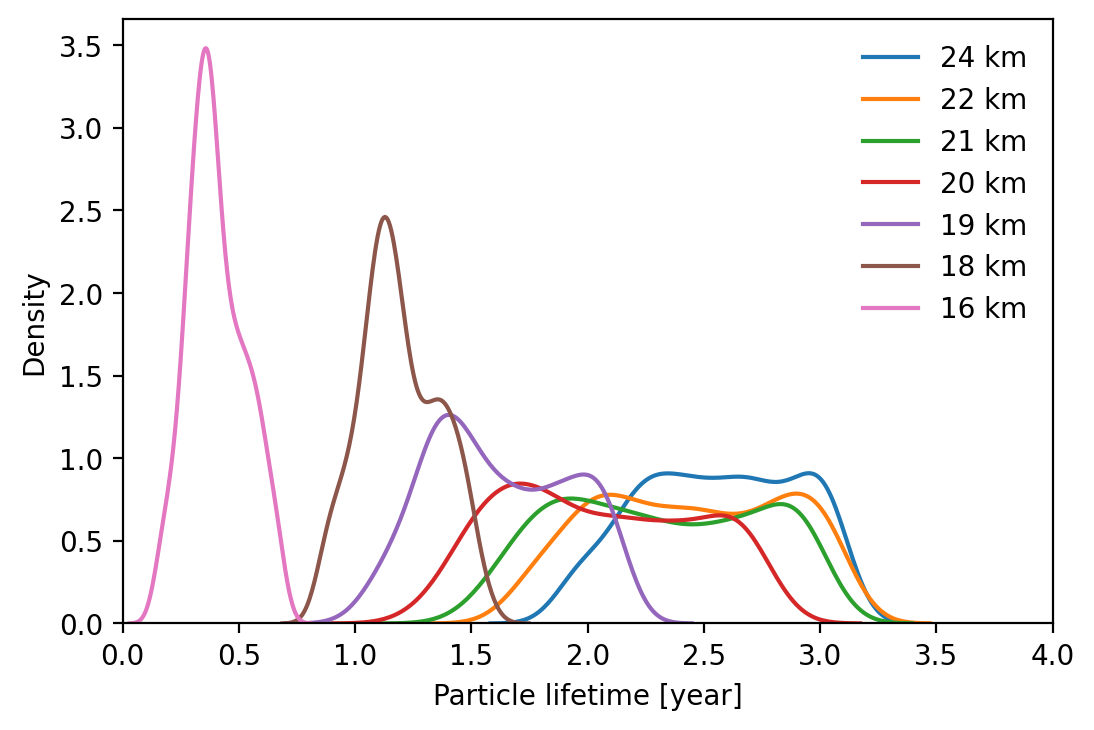

In [20]:
fig = plt.figure(figsize=(6,4), dpi=200)

sns.distplot(data77/365.25, kde=True, hist = False, label='24 km')
sns.distplot(data66/365.25, kde=True, hist = False, label='22 km')
sns.distplot(data55/365.25, kde=True, hist = False, label='21 km')
sns.distplot(data44/365.25, kde=True, hist = False, label='20 km')
sns.distplot(data33/365.25, kde=True, hist = False, label='19 km')
sns.distplot(data22/365.25, kde=True, hist = False, label='18 km')
sns.distplot(data11/365.25, kde=True, hist = False, label='16 km')

plt.xlim(0,4)
plt.xlabel("Particle lifetime [year]")

plt.legend(frameon=False)

No handles with labels found to put in legend.


<Figure size 600x400 with 0 Axes>

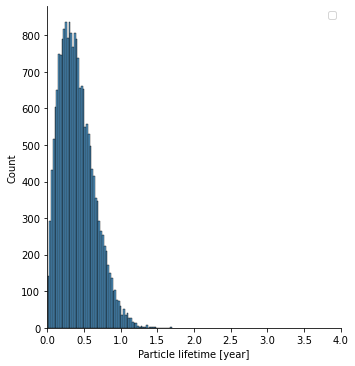

In [21]:
fig = plt.figure(figsize=(6,4), dpi=100)


# sns.distplot(data1/365.25, hist=False)
sns.displot(data1/365.25, kind="hist")

plt.xlim(0,4)
plt.xlabel("Particle lifetime [year]")

plt.legend()

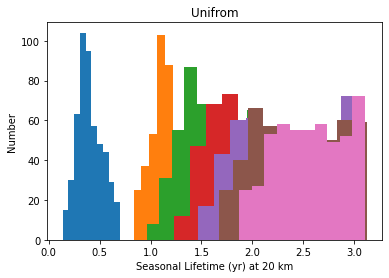

In [22]:
# lifetime_Seasons   = np.zeros((Nz, Ny, Nx, N_Seasons, N_year))
lifetime_uni_test = np.mean(lifetime_Seasons[:,:,:,:,:],axis=(3,4))

###
data = lifetime_uni_test[0,:,:].flatten()
plt.hist( data/365.25)

###
data = lifetime_uni_test[1,:,:].flatten()
plt.hist( data/365.25)

###
data = lifetime_uni_test[2,:,:].flatten()
plt.hist( data/365.25)

###
data = lifetime_uni_test[3,:,:].flatten()
plt.hist( data/365.25)

###
data = lifetime_uni_test[4,:,:].flatten()
plt.hist( data/365.25)

###
data = lifetime_uni_test[5,:,:].flatten()
plt.hist( data/365.25)

###
data = lifetime_uni_test[6,:,:].flatten()
plt.hist( data/365.25)

# plt.ylim(0,40)
plt.xlabel("Seasonal Lifetime (yr) at 20 km")
plt.ylabel("Number")
plt.title('Unifrom');

## Strategy_LP

In [23]:
# LP solver

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html

# (Nz, Ny, Nx, N_season)

Inject_Percent_LP = np.zeros((Nz, Ny, Nx, N_season))

Result_season  = lifetime_season[0,:,:,:]*0.0
Lifetime_LP    = lifetime_season[:,:,:,:]*0.0
Lifetime_LP_N  = lifetime_season[:,:,:,:]*0.0
Lifetime_LP_S  = lifetime_season[:,:,:,:]*0.0
D_lifetime_LP  = lifetime_season[:,:,:,:]*0.0

iz = 1

Diff_NS = 0.01

# for LP solve: max lifetime under the interhemispheric balance
for iz in range(Nz):
    print(iz)
    for iseason in range(N_season):
        Life   = lifetime_season[iz,:,:,iseason].flatten()
        Life_S = lifetime_N_season[iz,:,:,iseason].flatten()
        Life_N = lifetime_S_season[iz,:,:,iseason].flatten()

        if sum(Life_S)+sum(Life_N)-sum(Life)>0.01: print("ERROR!!!")
    
        N = len(Life)

        #
        c = -1*Life

        Xs_bounds = []
        A1 = []
        A3 = []
        A4 = []
        A  = []
        for i in range(N):
            Xs_bounds.append((0, N))
            A1.append(1)
            A3.append( Life_N[i] -Life_S[i] -Diff_NS*Life[i] )
            A4.append( -1*(Life_N[i] -Life_S[i] +Diff_NS*Life[i]) )

        Aub = [A3,A4]
        Aeq = [A1]   

        b_ub = [0,0]
        b_eq = [N]

        from scipy.optimize import linprog
        res = linprog(c, A_eq=Aeq, b_eq=b_eq, A_ub=Aub, b_ub=b_ub, bounds=Xs_bounds)
    
        # post-process, calculate the injection percentage
        Result1d = np.round(res.x)
        Result2d = Result1d.reshape(Ny,Nx)
        Result2d = Result2d/np.sum(Result2d)*100
    
        Result_season[:,:,iseason] = Result2d
    
    Inject_Percent_LP[iz,:,:,:] = Result_season # (unit: %)
    
    Lifetime_LP[iz,:,:,:] = lifetime_season[iz,:,:,:]* (Result_season/100)

    Lifetime_LP_N[iz,:,:,:] = lifetime_N_season[iz,:,:,:]* (Result_season/100)
    Lifetime_LP_S[iz,:,:,:] = lifetime_S_season[iz,:,:,:]* (Result_season/100)
    D_lifetime_LP[iz,:,:,:] = Lifetime_LP_N[iz,:,:,:] - Lifetime_LP_S[iz,:,:,:]
    
    # std
    
    for iyr in range(N_year):
        tmp = lifetime_Seasons[iz,:,:,:,iyr]* (Result_season/100)
        lifetime_LP_series[iz,:,iyr] = np.sum(tmp, axis=(0,1))
        
#         lifetime_LP_mean[iz] = np.mean(lifetime_LP_series[iz,:,:], axis=(0,1))
#         lifetime_LP_std[iz] = np.std(lifetime_LP_series[iz,:,:], axis=(0,1))
#         lifetime_LP_med[iz] = np.median(lifetime_LP_series[iz,:,:], axis=(0,1))
#         lifetime_LP_25th[iz] = np.percentile(lifetime_LP_series[iz,:,:], 25, axis=(0,1))
#         lifetime_LP_75th[iz] = np.percentile(lifetime_LP_series[iz,:,:], 75, axis=(0,1))
        
# lifetime_Seasons   = np.zeros((Nz, Ny, Nx, N_Seasons, N_year))
# lifetime_uni_series = np.mean(lifetime_Seasons[:,:,:,:,:],axis=(0,1,2))
# lifetime_uni_std = np.std(lifetime_series)
# lifetime_uni_std    

print(lifetime_season[:,:,:,:].shape, Result_season.shape)


0
1
2
3
4
5
6
(7, 21, 24, 4) (21, 24, 4)


In [24]:
lifetime_LP_mean = np.mean(lifetime_LP_series[:,:,:], axis=(1,2))
lifetime_LP_std = np.std(lifetime_LP_series[:,:,:], axis=(1,2))
lifetime_LP_med = np.median(lifetime_LP_series[:,:,:], axis=(1,2))
lifetime_LP_25th = np.percentile(lifetime_LP_series[:,:,:], 25, axis=(1,2))
lifetime_LP_75th = np.percentile(lifetime_LP_series[:,:,:], 75, axis=(1,2))
        
        
lifetime_LP_std  = lifetime_LP_std/365
lifetime_LP_mean = lifetime_LP_mean/365
lifetime_LP_med  = lifetime_LP_med/365
lifetime_LP_25th  = lifetime_LP_25th/365
lifetime_LP_75th  = lifetime_LP_75th/365

print(lifetime_LP_mean)
print(lifetime_LP_std)
print(Height)

[0.73502918 1.71307486 2.29571654 2.92349424 3.16440472 3.22034376
 3.26244017]
[0.15992932 0.33683245 0.35516502 0.33168237 0.32425944 0.25209304
 0.20587942]
[16, 17.92, 18.87, 20, 21.05, 22.1, 24]


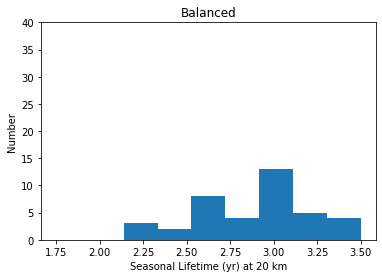

In [25]:
# data = np.mean(lifetime_LP_series[2,:,:], axis=0)
data = lifetime_LP_series[3,:,:].flatten()

plt.hist( data/365.25, bins = np.linspace(1.75,3.5,10) )
plt.ylim(0,40)

plt.xlabel("Seasonal Lifetime (yr) at 20 km")
plt.ylabel("Number")
plt.title('Balanced');

## Stratege_Y

In [26]:
# get max lifetime by only selecting LAT (averaged over all LON)

Inject_Percent_Y = np.zeros((Nz, Ny, Nx, N_season))

lifetime_season_Xmean   = np.mean(lifetime_season, axis=2)
lifetime_N_season_Xmean = np.mean(lifetime_N_season, axis=2)
lifetime_S_season_Xmean = np.mean(lifetime_S_season, axis=2)

lifetime_Seasons_Xmean   = np.mean(lifetime_Seasons, axis=2)

print(lifetime_season_Xmean.shape)

Inject_percent    = np.zeros((Nz, Ny, N_season))
Lifetime_MaxLat   = np.zeros((Nz, Ny, N_season))
Lifetime_MaxLat_N = np.zeros((Nz, Ny, N_season))
Lifetime_MaxLat_S = np.zeros((Nz, Ny, N_season))
D_lifetime_MaxLat = np.zeros((Nz, Ny, N_season))
print(Inject_percent.shape)

for iz in range(Nz):
    for i_season in range(N_season):
        a   = np.mean(lifetime_season[iz,:,:,i_season], axis=1)
        idx = np.unravel_index(np.argmax(a, axis=None), a.shape)
#         print(iz,idx[0],i_season)
        Inject_percent[iz,idx[0],i_season] = 100
        Inject_Percent_Y[iz,idx[0],:,i_season] = 1.0/Nx*100 # (unit:%)

    Lifetime_MaxLat[iz,:,:] = lifetime_season_Xmean[iz,:,:]* (Inject_percent[iz,:,:]/100)

    Lifetime_MaxLat_N[iz,:,:] = lifetime_N_season_Xmean[iz,:,:]* (Inject_percent[iz,:,:]/100)
    Lifetime_MaxLat_S[iz,:,:] = lifetime_S_season_Xmean[iz,:,:]* (Inject_percent[iz,:,:]/100)
    D_lifetime_MaxLat[iz,:,:] = Lifetime_MaxLat_N[iz,:,:] - Lifetime_MaxLat_S[iz,:,:]
    
    # std
    for iyr in range(N_year):
        tmp = lifetime_Seasons_Xmean[iz,:,:,iyr]* (Inject_percent[iz,:,:]/100)
        lifetime_Y_series[iz,:,iyr] = np.sum(tmp, axis=(0))
#         lifetime_Y_std[iz] = np.std(lifetime_Y_series[iz,:,:])
    
        lifetime_Y_mean[iz] = np.mean(lifetime_Y_series[iz,:,:], axis=(0,1))
        lifetime_Y_std[iz] = np.std(lifetime_Y_series[iz,:,:], axis=(0,1))
        lifetime_Y_med[iz] = np.median(lifetime_Y_series[iz,:,:], axis=(0,1))
        lifetime_Y_25th[iz] = np.percentile(lifetime_Y_series[iz,:,:], 25, axis=(0,1))
        lifetime_Y_75th[iz] = np.percentile(lifetime_Y_series[iz,:,:], 75, axis=(0,1))
    

(7, 21, 4)
(7, 21, 4)


In [27]:
lifetime_Y_std  = lifetime_Y_std/365
lifetime_Y_mean = lifetime_Y_mean/365
lifetime_Y_med  = lifetime_Y_med/365
lifetime_Y_25th  = lifetime_Y_25th/365
lifetime_Y_75th  = lifetime_Y_75th/365

print(lifetime_Y_mean)
print(lifetime_Y_std)
print(Height)

[0.74669568 1.50359817 2.13693193 2.76245277 3.02269035 3.11138665
 3.12603924]
[0.11920188 0.20468891 0.22121586 0.17117968 0.13968319 0.11318864
 0.12711716]
[16, 17.92, 18.87, 20, 21.05, 22.1, 24]


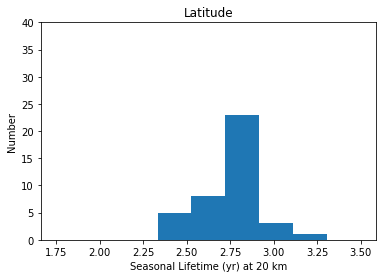

In [28]:
# data = np.mean(lifetime_Y_series[2,:,:], axis=0)
data = lifetime_Y_series[3,:,:].flatten()

plt.hist( data/365.25, bins = np.linspace(1.75,3.5,10) )
plt.ylim(0,40)

plt.xlabel("Seasonal Lifetime (yr) at 20 km")
plt.ylabel("Number")
plt.title('Latitude');

## Strategy_XY

In [29]:
# get the max lifetime by selecting both LON and LAT

Inject_Percent_XY = np.zeros((Nz, Ny, Nx, N_season))

Inject_percent = np.zeros((Nz, Ny, Nx, N_season))
Lifetime_max   = np.zeros((Nz, Ny, Nx, N_season))
Lifetime_max_N = np.zeros((Nz, Ny, Nx, N_season))
Lifetime_max_S = np.zeros((Nz, Ny, Nx, N_season))
D_lifetime_max = np.zeros((Nz, Ny, Nx, N_season))

print(Inject_percent.shape)

for iz in range(Nz):
    for i_season in range(N_season):
        a   = lifetime_season[iz,:,:,i_season]
        # Converts a flat index or array of flat indices into a tuple of coordinate arrays
        idx = np.unravel_index(np.argmax(a, axis=None), a.shape) 
#         print(iz,idx[0],idx[1],i_season)
        Inject_percent[iz,idx[0],idx[1],i_season] = 100
        Inject_Percent_XY[iz,idx[0],idx[1],i_season] = 100 # (unit:%)

    Lifetime_max[iz,:,:,:] = lifetime_season[iz,:,:,:]* (Inject_percent[iz,:,:,:]/100)

    Lifetime_max_N[iz,:,:,:] = lifetime_N_season[iz,:,:,:]* (Inject_percent[iz,:,:,:]/100)
    Lifetime_max_S[iz,:,:,:] = lifetime_S_season[iz,:,:,:]* (Inject_percent[iz,:,:,:]/100)
    D_lifetime_max[iz,:,:,:] = Lifetime_max_N[iz,:,:,:] - Lifetime_max_S[iz,:,:,:]
    
    
    # std
    for iyr in range(N_year):
        tmp = lifetime_Seasons[iz,:,:,:,iyr]* (Inject_percent[iz,:,:,:]/100)
        lifetime_XY_series[iz,:,iyr] = np.sum(tmp, axis=(0,1))
        
#         lifetime_XY_mean[iz] = np.mean(lifetime_XY_series[iz,:,:], axis=(0,1))
#         lifetime_XY_std[iz] = np.std(lifetime_XY_series[iz,:,:], axis=(0,1))
#         lifetime_XY_med[iz] = np.median(lifetime_XY_series[iz,:,:], axis=(0,1))
#         lifetime_XY_25th[iz] = np.percentile(lifetime_XY_series[iz,:,:], 25, axis=(0,1))
#         lifetime_XY_75th[iz] = np.percentile(lifetime_XY_series[iz,:,:], 75, axis=(0,1))

(7, 21, 24, 4)


In [30]:
lifetime_XY_mean = np.mean(lifetime_XY_series[:,:,:], axis=(1,2))
lifetime_XY_std  = np.std(lifetime_XY_series[:,:,:], axis=(1,2))
lifetime_XY_med  = np.median(lifetime_XY_series[:,:,:], axis=(1,2))
lifetime_XY_25th = np.percentile(lifetime_XY_series[:,:,:], 25, axis=(1,2))
lifetime_XY_75th = np.percentile(lifetime_XY_series[:,:,:], 75, axis=(1,2))
        
        
lifetime_XY_std  = lifetime_XY_std/365
lifetime_XY_mean = lifetime_XY_mean/365
lifetime_XY_med  = lifetime_XY_med/365
lifetime_XY_25th  = lifetime_XY_25th/365
lifetime_XY_75th  = lifetime_XY_75th/365

print(lifetime_XY_mean)
print(lifetime_XY_std)
print(Height)

[0.87871689 1.77173059 2.37707534 2.96387329 3.20346461 3.26945776
 3.31049543]
[0.21423408 0.40549019 0.43425837 0.3775196  0.31899101 0.2636423
 0.25040543]
[16, 17.92, 18.87, 20, 21.05, 22.1, 24]


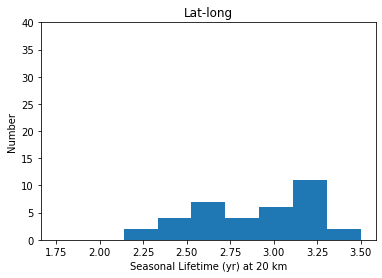

In [31]:
# data = np.mean(lifetime_XY_series[2,:,:], axis=0)
data = lifetime_XY_series[3,:,:].flatten()
               
plt.hist( data/365.25, bins = np.linspace(1.75,3.5,10) )
plt.ylim(0,40)

plt.xlabel("Seasonal Lifetime (yr) at 20 km")
plt.ylabel("Number")
plt.title('Lat-long');

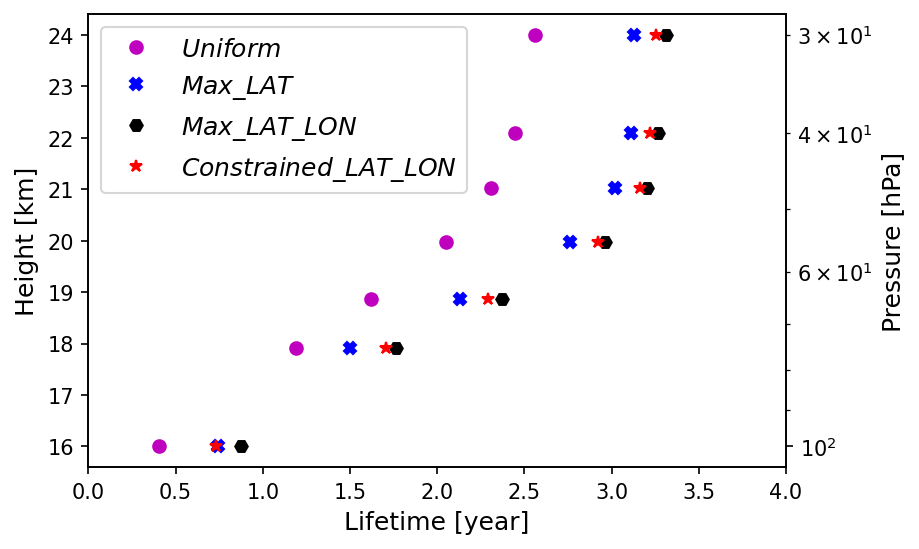

In [32]:
Pressure = [100, 75, 65, 55, 47, 40, 30] # hPa
Height   = [16,  17.92, 18.87, 20, 21.05, 22.1, 24] # km

Life_LP_season = np.sum(Lifetime_LP[:,:,:,:], axis=(1,2))/365.25
Life_MaxLat_season = np.sum(Lifetime_MaxLat[:,:,:], axis=(1))/365.25
Life_max_season = np.sum(Lifetime_max[:,:,:,:], axis=(1,2))/365.25
Life_uniform_season = np.mean(lifetime_season[:,:,:,:],axis=(1,2))/365.25

Life_LP_z  = np.mean(Life_LP_season[:,:],axis=1)
Life_MaxLat_z = np.mean(Life_MaxLat_season[:,:],axis=1)
Life_max_z = np.mean(Life_max_season[:,:],axis=1)
Life_uniform_z = np.mean(Life_uniform_season[:,:],axis=1)

### plot
fig, ax1 = plt.subplots(figsize=(6,4), dpi=150)

###
# ax1.plot([Life_uniform_z, 1.9*Life_uniform_z], [Height, Height], '--', label='Strategy_Uni')
ax1.plot(Life_uniform_z, Height, 'wo', label='Strategy_Uni')

ax1.set_xlim(0,4.0)

ax1.set_xlabel('Lifetime [year]', fontsize=12)
ax1.set_ylabel('Height [km]', fontsize=12)
# ax1.legend(loc='center left', fontsize=12);

###
ax2 = ax1.twinx()
ax2.plot(Life_uniform_z, Pressure, 'mo', label='$Uniform$')
ax2.plot(Life_MaxLat_z, Pressure, 'bX', label='$Max$_$LAT$')
ax2.plot(Life_max_z, Pressure, 'kH', label='$Max$_$LAT$_$LON$')
ax2.plot(Life_LP_z, Pressure, 'r*', label='$Constrained$_$LAT$_$LON$')


ax2.set_ylabel('Pressure [hPa]', fontsize=12)
ax2.set_yscale('log')
ax2.invert_yaxis()
ax2.legend(loc="upper left", fontsize=12);

###
# ax3 = ax1.twinx()
# ax3.plot(Life_LP_z, Pressure, 'b*', label='LP solver lifetime')

# ax3.set_ylabel('Pressure [hPa]', fontsize=12)
# ax3.set_yscale('log')
# ax3.invert_yaxis()
# ax3.legend(loc="upper left", fontsize=12);


# plt.title('Lifetime at different height (seasonal data)', fontsize=14);

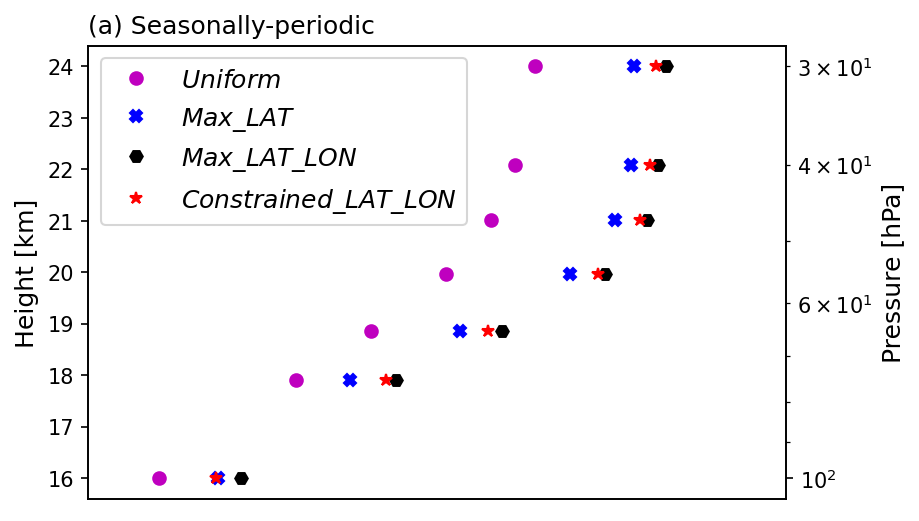

In [33]:
### plot
fig, ax1 = plt.subplots(figsize=(6,4), dpi=150)

###
# ax1.plot([Life_uniform_z, 1.9*Life_uniform_z], [Height, Height], '--', label='Strategy_Uni')
ax1.plot(Life_uniform_z, Height, 'wo', label='Strategy_Uni')

ax1.set_xlim(0,4.0)

# ax1.set_xlabel('Lifetime [year]', fontsize=12)
ax1.set_ylabel('Height [km]', fontsize=12)
# ax1.legend(loc='center left', fontsize=12);
ax1.axes.xaxis.set_visible(False)
ax1.set_title("(a) Seasonally-periodic", fontsize=12, loc='left')

###
ax2 = ax1.twinx()
ax2.plot(Life_uniform_z, Pressure, 'mo', label='$Uniform$')
ax2.plot(Life_MaxLat_z, Pressure, 'bX', label='$Max$_$LAT$')
ax2.plot(Life_max_z, Pressure, 'kH', label='$Max$_$LAT$_$LON$')
ax2.plot(Life_LP_z, Pressure, 'r*', label='$Constrained$_$LAT$_$LON$')


ax2.set_ylabel('Pressure [hPa]', fontsize=12)
ax2.set_yscale('log')
ax2.invert_yaxis()
ax2.legend(loc="upper left", fontsize=12);



In [34]:
np.max(Life_max_z)

3.315012548482774

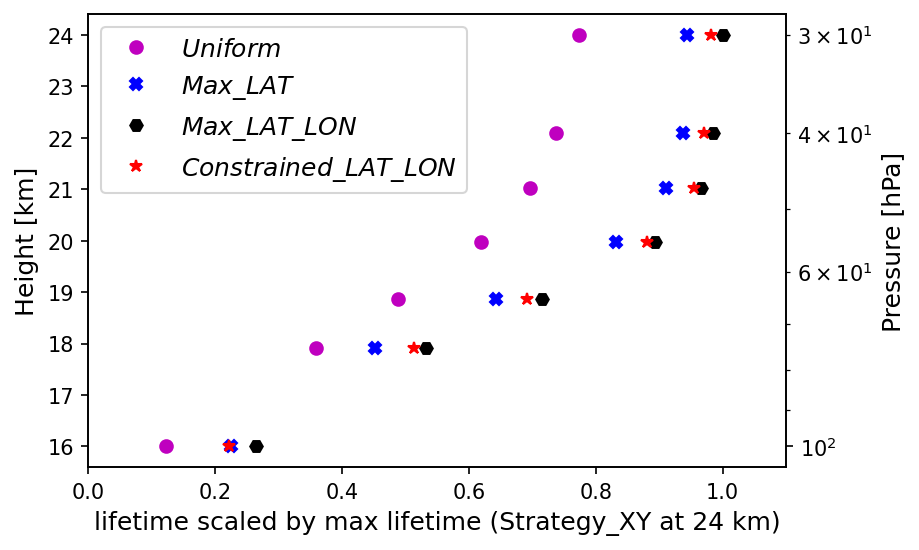

In [35]:
### plot
fig, ax1 = plt.subplots(figsize=(6,4), dpi=150)

Maximum = np.max(Life_max_z)

###
ax1.plot(Life_uniform_z/Maximum, Height, 'wo', label='Strategy_Uni')

ax1.set_xlim(0,1.1)

ax1.set_xlabel('lifetime scaled by max lifetime (Strategy_XY at 24 km)', fontsize=12)
ax1.set_ylabel('Height [km]', fontsize=12)
# ax1.legend(loc='center left', fontsize=12);

###
ax2 = ax1.twinx()
ax2.plot(Life_uniform_z/Maximum, Pressure, 'mo', label='$Uniform$')
ax2.plot(Life_MaxLat_z/Maximum, Pressure, 'bX', label='$Max$_$LAT$')
ax2.plot(Life_max_z/Maximum, Pressure, 'kH', label='$Max$_$LAT$_$LON$')
ax2.plot(Life_LP_z/Maximum, Pressure, 'r*', label='$Constrained$_$LAT$_$LON$')


ax2.set_ylabel('Pressure [hPa]', fontsize=12)
ax2.set_yscale('log')
ax2.invert_yaxis()
ax2.legend(loc="upper left", fontsize=12);

In [36]:
# total mean:
Life_max_AllMean = np.mean(Life_max_z)
Life_LP_AllMean = np.mean(Life_LP_z)
Life_MaxLat_AllMean = np.mean(Life_MaxLat_z)
Life_uniform_AllMean = np.mean(Life_uniform_z)

Life_max_AllMean, Life_LP_AllMean, Life_MaxLat_AllMean, Life_uniform_AllMean

(2.537646100192301, 2.4705612865725803, 2.3422287544951814, 1.798034693153252)

## Calculate the interhemispheric balance

In [37]:
D_lifetime_LP.shape, D_lifetime_max.shape, D_lifetime_MaxLat.shape, D_lifetime_uniform.shape

((7, 21, 24, 4), (7, 21, 24, 4), (7, 21, 4), (7, 21, 24, 4))

In [38]:
# use np.sum if a injection percent is applied to the variable before

D_lifetime_LP_XYmean      = np.sum(D_lifetime_LP, axis=(1,2))
D_lifetime_MaxLat_XYmean  = np.sum(D_lifetime_MaxLat, axis=(1))
D_lifetime_max_XYmean     = np.sum(D_lifetime_max, axis=(1,2))
D_lifetime_uniform_XYmean = np.mean(D_lifetime_uniform, axis=(1,2))

D_lifetime_LP_XYmean.shape, D_lifetime_max_XYmean.shape, D_lifetime_MaxLat_XYmean.shape, D_lifetime_uniform_XYmean.shape

((7, 4), (7, 4), (7, 4), (7, 4))

In [39]:
# interhemispheric balance

print(np.mean(abs(D_lifetime_uniform_XYmean), axis=1)/365.25)
print(np.mean(abs(D_lifetime_MaxLat_XYmean), axis=1)/365.25)
print(np.mean(abs(D_lifetime_max_XYmean), axis=1)/365.25)
print(np.mean(abs(D_lifetime_LP_XYmean), axis=1)/365.25)


[0.0655055  0.09967784 0.09426802 0.05865949 0.03944983 0.05133291
 0.09470213]
[0.5570531  0.5430258  0.51400411 0.16946526 0.55712183 0.57214902
 0.66553198]
[0.62149897 0.42217431 0.5278371  0.34623317 0.67660507 0.69355464
 0.65853069]
[0.00666114 0.01675193 0.02259798 0.02887943 0.03157034 0.03252952
 0.02646308]


In [40]:
print(np.mean(abs(D_lifetime_LP_XYmean), axis=(0,1))/365.25)
print(np.mean(abs(D_lifetime_max_XYmean), axis=(0,1))/365.25)
print(np.mean(abs(D_lifetime_MaxLat_XYmean), axis=(0,1))/365.25)
print(np.mean(abs(D_lifetime_uniform_XYmean), axis=(0,1))/365.25)

0.02363620419648581
0.5637762784785372
0.5111930157643712
0.07194224697255895


## Compare (Mean, Std) to (Medium, 25% and 75% percentile)

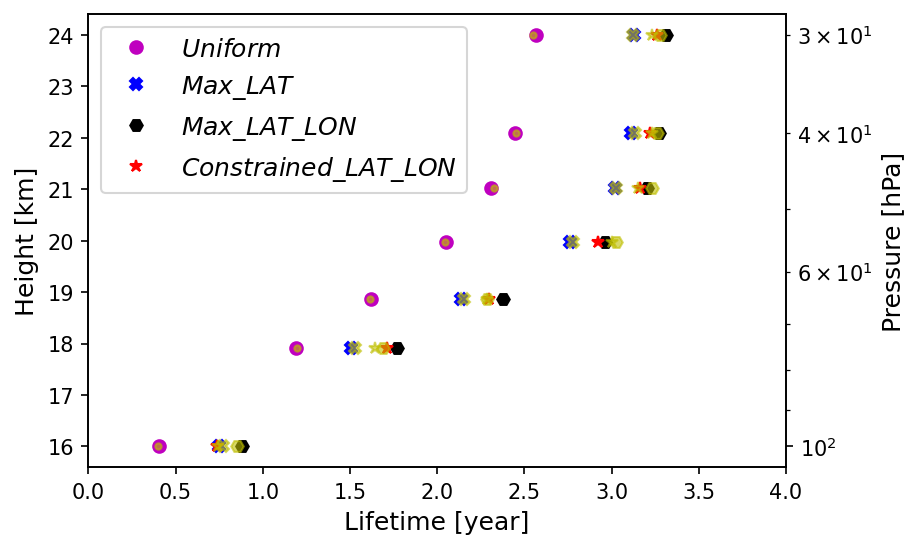

In [41]:
# Mean vs. Medium

### plot
fig, ax1 = plt.subplots(figsize=(6,4), dpi=150)

###
# ax1.plot([Life_uniform_z, 1.9*Life_uniform_z], [Height, Height], '--', label='Strategy_Uni')
ax1.plot(lifetime_uni_mean, Height, 'wo', label='Strategy_Uni')

ax1.set_xlim(0,4.0)

ax1.set_xlabel('Lifetime [year]', fontsize=12)
ax1.set_ylabel('Height [km]', fontsize=12)
# ax1.legend(loc='center left', fontsize=12);

###
ax2 = ax1.twinx()
ax2.plot(lifetime_uni_mean, Pressure, 'mo', label='$Uniform$')
ax2.plot(lifetime_Y_mean, Pressure, 'bX', label='$Max$_$LAT$')
ax2.plot(lifetime_XY_mean, Pressure, 'kH', label='$Max$_$LAT$_$LON$')
ax2.plot(lifetime_LP_mean, Pressure, 'r*', label='$Constrained$_$LAT$_$LON$')

ax2.plot(lifetime_uni_med, Pressure, 'y.', alpha=0.6)
ax2.plot(lifetime_Y_med, Pressure, 'yX', alpha=0.6)
ax2.plot(lifetime_XY_med, Pressure, 'yH', alpha=0.6)
ax2.plot(lifetime_LP_med, Pressure, 'y*', alpha=0.6)

ax2.set_ylabel('Pressure [hPa]', fontsize=12)
ax2.set_yscale('log')
ax2.invert_yaxis()
ax2.legend(loc="upper left", fontsize=12);

In [42]:
# lifetime_LP_std   = lifetime_LP_std/365
# lifetime_LP_mean  = lifetime_LP_mean/365
# lifetime_LP_med   = lifetime_LP_med/365
# lifetime_LP_25th  = lifetime_LP_25th/365
# lifetime_LP_75th  = lifetime_LP_75th/365
lifetime_LP_std

array([0.15992932, 0.33683245, 0.35516502, 0.33168237, 0.32425944,
       0.25209304, 0.20587942])

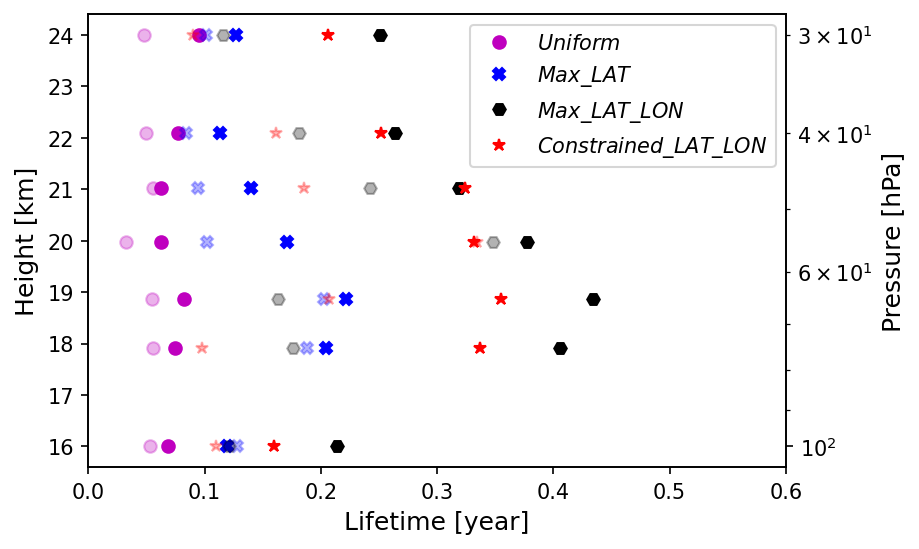

In [43]:
# std vs. 25th

### plot
fig, ax1 = plt.subplots(figsize=(6,4), dpi=150)

###
# ax1.plot([Life_uniform_z, 1.9*Life_uniform_z], [Height, Height], '--', label='Strategy_Uni')
ax1.plot(lifetime_uni_std, Height, 'wo', label='Strategy_Uni')

ax1.set_xlim(0,0.6)

ax1.set_xlabel('Lifetime [year]', fontsize=12)
ax1.set_ylabel('Height [km]', fontsize=12)
# ax1.legend(loc='center left', fontsize=12);

###
ax2 = ax1.twinx()
ax2.plot(lifetime_uni_std, Pressure, 'mo', label='$Uniform$')
ax2.plot(lifetime_Y_std, Pressure, 'bX', label='$Max$_$LAT$')
ax2.plot(lifetime_XY_std, Pressure, 'kH', label='$Max$_$LAT$_$LON$')
ax2.plot(lifetime_LP_std, Pressure, 'r*', label='$Constrained$_$LAT$_$LON$')

ax2.plot(lifetime_uni_med - lifetime_uni_25th, Pressure, 'mo', alpha=0.3)
ax2.plot(lifetime_Y_med - lifetime_Y_25th, Pressure, 'bX', alpha=0.3)
ax2.plot(lifetime_XY_med - lifetime_XY_25th, Pressure, 'kH', alpha=0.3)
ax2.plot(lifetime_LP_med - lifetime_LP_25th, Pressure, 'r*', alpha=0.3)

ax2.set_ylabel('Pressure [hPa]', fontsize=12)
ax2.set_yscale('log')
ax2.invert_yaxis()
ax2.legend(loc="upper right", fontsize=10);

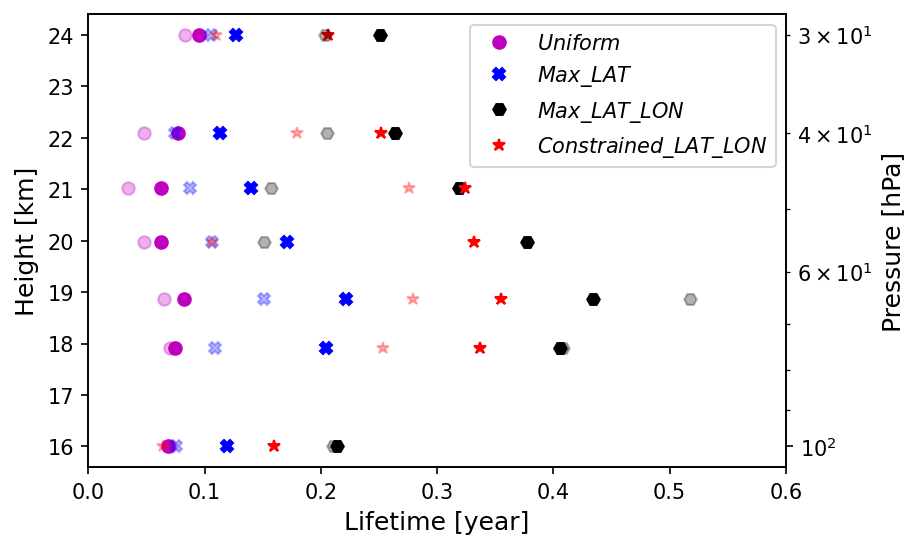

In [44]:
# std vs. 75th

### plot
fig, ax1 = plt.subplots(figsize=(6,4), dpi=150)

###
# ax1.plot([Life_uniform_z, 1.9*Life_uniform_z], [Height, Height], '--', label='Strategy_Uni')
ax1.plot(lifetime_uni_std, Height, 'wo', label='Strategy_Uni')

ax1.set_xlim(0,0.6)

ax1.set_xlabel('Lifetime [year]', fontsize=12)
ax1.set_ylabel('Height [km]', fontsize=12)
# ax1.legend(loc='center left', fontsize=12);

###
ax2 = ax1.twinx()
ax2.plot(lifetime_uni_std, Pressure, 'mo', label='$Uniform$')
ax2.plot(lifetime_Y_std, Pressure, 'bX', label='$Max$_$LAT$')
ax2.plot(lifetime_XY_std, Pressure, 'kH', label='$Max$_$LAT$_$LON$')
ax2.plot(lifetime_LP_std, Pressure, 'r*', label='$Constrained$_$LAT$_$LON$')

ax2.plot(lifetime_uni_75th-lifetime_uni_med, Pressure, 'mo', alpha=0.3)
ax2.plot(lifetime_Y_75th-lifetime_Y_med, Pressure, 'bX', alpha=0.3)
ax2.plot(lifetime_XY_75th-lifetime_XY_med, Pressure, 'kH', alpha=0.3)
ax2.plot(lifetime_LP_75th-lifetime_LP_med, Pressure, 'r*', alpha=0.3)

ax2.set_ylabel('Pressure [hPa]', fontsize=12)
ax2.set_yscale('log')
ax2.invert_yaxis()
ax2.legend(loc="upper right", fontsize=10);

## piecewise regression

https://datascience.stackexchange.com/questions/8457/python-library-for-segmented-regression-a-k-a-piecewise-regression

Muggeo, V. M. (2003). Estimating regression models with unknown breakpoints. Statistics in medicine, 22(19), 3055-3071.

In [45]:
import numpy as np
from numpy.linalg import lstsq

ramp = lambda u: np.maximum( u, 0 )
step = lambda u: ( u > 0 ).astype(float)

def SegmentedLinearReg( X, Y, breakpoints ):
#     nIterationMax = 10
    nIterationMax = 100 ### shw


    breakpoints = np.sort( np.array(breakpoints) )

#     dt = np.min( np.diff(X) )
    dt = np.min( np.diff(X)/10 ) ### shw
    
    ones = np.ones_like(X)

    for i in range( nIterationMax ):
        # Linear regression:  solve A*p = Y
        Rk = [ramp( X - xk ) for xk in breakpoints ]
        Sk = [step( X - xk ) for xk in breakpoints ]
        A = np.array([ ones, X ] + Rk + Sk )
        p =  lstsq(A.transpose(), Y, rcond=None)[0] 

        # Parameters identification:
        a, b = p[0:2]
        ck = p[ 2:2+len(breakpoints) ]
        dk = p[ 2+len(breakpoints): ]

        # Estimation of the next break-points:
        newBreakpoints = breakpoints - dk/ck
        print(newBreakpoints)

        # Stop condition
#         if np.max(np.abs(newBreakpoints - breakpoints)) < dt/5: ### shw
        if np.max(np.abs(newBreakpoints - breakpoints)) < dt/100: ### shw
            break

        breakpoints = newBreakpoints
    else:
        print( 'maximum iteration reached' )

    # Compute the final segmented fit:
    Xsolution = np.insert( np.append( breakpoints, max(X) ), 0, min(X) )
    ones =  np.ones_like(Xsolution) 
    Rk = [ c*ramp( Xsolution - x0 ) for x0, c in zip(breakpoints, ck) ]

    Ysolution = a*ones + b*Xsolution + np.sum( Rk, axis=0 )

    return Xsolution, Ysolution

[1.8607353]
[2.10534246]
[2.27692837]
[2.27692837]
[1.8607353]
[2.10534246]
[2.27692837]
[2.27692837]
[0.404788   2.27692837 2.56364907] [15.99789873 20.51201762 23.81489296]
[2.90404704]
[3.00790929]
[3.00790929]
[2.90404704]
[3.00790929]
[3.00790929]
[0.74529632 3.00790929 3.12790897] [16.17184612 20.58403032 23.33356396]
[2.75661434]
[3.022422]
[3.18974224]
[3.18974224]
[2.75661434]
[3.022422]
[3.18974224]
[3.18974224]
[0.87678531 3.18974224 3.31501255] [16.07746127 20.46667849 23.76440287]
[2.60279686]
[2.97415038]
[3.15267344]
[3.15267344]
[2.60279686]
[2.97415038]
[3.15267344]
[3.15267344]
[0.73358055 3.15267344 3.25712072] [16.05156328 20.45271006 23.74896407]


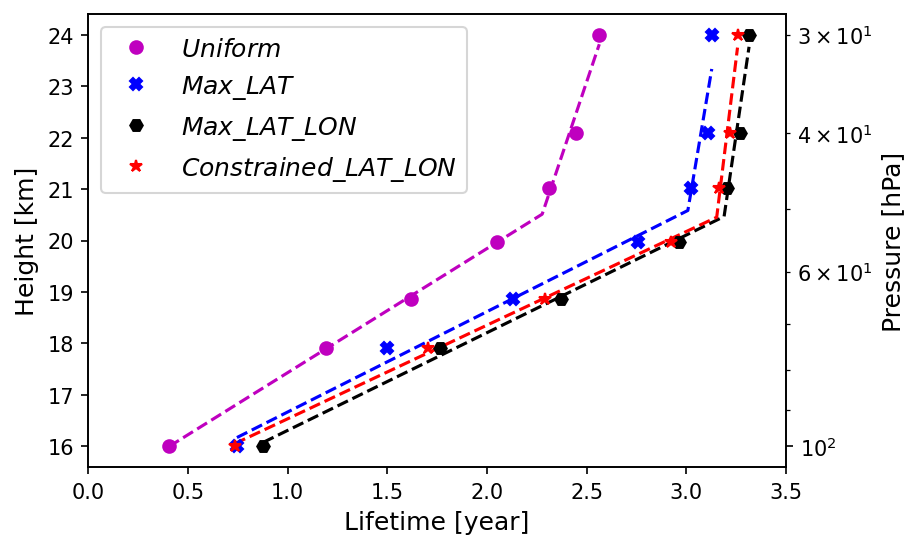

In [46]:
### plot
fig, ax1 = plt.subplots(figsize=(6,4), dpi=150)

###
# ax1.plot([Life_uniform_z, 1.9*Life_uniform_z], [Height, Height], '--', label='Strategy_Uni')
ax1.plot(Life_uniform_z, Height, 'wo', label='Strategy_Uni')

ax1.set_xlim(0,3.5)

ax1.set_xlabel('Lifetime [year]', fontsize=12)
ax1.set_ylabel('Height [km]', fontsize=12)
# ax1.legend(loc='center left', fontsize=12);

###
ax2 = ax1.twinx()
ax2.plot(Life_uniform_z, Pressure, 'mo', label='$Uniform$')
ax2.plot(Life_MaxLat_z, Pressure, 'bX', label='$Max$_$LAT$')
ax2.plot(Life_max_z, Pressure, 'kH', label='$Max$_$LAT$_$LON$')
ax2.plot(Life_LP_z, Pressure, 'r*', label='$Constrained$_$LAT$_$LON$')


ax2.set_ylabel('Pressure [hPa]', fontsize=12)
ax2.set_yscale('log')
ax2.invert_yaxis()
ax2.legend(loc="upper left", fontsize=12);


# for piecewise regression

X1 = Life_uniform_z
X2 = Life_MaxLat_z
X3 = Life_max_z
X4 = Life_LP_z
Y = Height

N_init = 1
initialBreakpoints1 = [X1[N_init]]
ax1.plot( *SegmentedLinearReg( X1, Y, initialBreakpoints1 ), 'm--', label=f'{initialBreakpoints1}');
print(*SegmentedLinearReg( X1, Y, initialBreakpoints1 ))

initialBreakpoints2 = [X2[N_init]]
ax1.plot( *SegmentedLinearReg( X2, Y, initialBreakpoints2 ), 'b--', label=f'{initialBreakpoints2}');
print(*SegmentedLinearReg( X2, Y, initialBreakpoints2 ))

initialBreakpoints3 = [X3[N_init]]
ax1.plot( *SegmentedLinearReg( X3, Y, initialBreakpoints3 ), 'k--', label=f'{initialBreakpoints3}');
print(*SegmentedLinearReg( X3, Y, initialBreakpoints3 ))

initialBreakpoints4 = [X4[N_init]]
ax1.plot( *SegmentedLinearReg( X4, Y, initialBreakpoints4 ), 'r--', label=f'{initialBreakpoints4}');
print(*SegmentedLinearReg( X4, Y, initialBreakpoints4 ))

# plt.xlabel('X'); plt.ylabel('Y');
# plt.legend()

[0.404788   1.19138645 1.62031249 2.05162729 2.30954152 2.44493802
 2.56364907] [100, 75, 65, 55, 47, 40, 30]


NameError: name 'X' is not defined

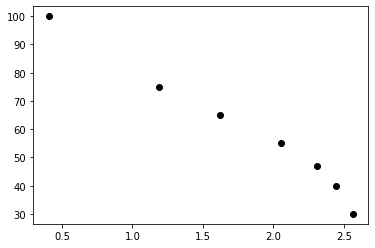

In [47]:
import matplotlib.pyplot as plt
# Life_uniform_z/Maximum, Height

X1 = Life_uniform_z
X2 = Life_MaxLat_z
X3 = Life_max_z
X4 = Life_LP_z
Y = Pressure

ax2.plot(Life_uniform_z/Maximum, Pressure, 'mo', label='$Uniform$')
ax2.plot(Life_MaxLat_z/Maximum, Pressure, 'bX', label='$Max$_$LAT$')
ax2.plot(Life_max_z/Maximum, Pressure, 'kH', label='$Max$_$LAT$_$LON$')
ax2.plot(Life_LP_z/Maximum, Pressure, 'r*', label='$Constrained$_$LAT$_$LON$')
plt.plot( X1, Y, 'ok' );
print(Life_uniform_z, Pressure)

initialBreakpoints = [X1[1]]
plt.plot( *SegmentedLinearReg( X, Y, initialBreakpoints ), 'r-', label=f'{initialBreakpoints}');
plt.xlabel('X'); plt.ylabel('Y');
plt.legend()

# initialBreakpoints = [Life_uniform_z[2]]
# plt.plot( *SegmentedLinearReg( X, Y, initialBreakpoints ), 'k--', label=f'{initialBreakpoints}');
# plt.xlabel('X'); plt.ylabel('Y');
# plt.legend()

# initialBreakpoints = [Life_uniform_z[3]]
# plt.plot( *SegmentedLinearReg( X, Y, initialBreakpoints ), 'b-.', label=f'{initialBreakpoints}');
# plt.xlabel('X'); plt.ylabel('Y');
# plt.legend()

# initialBreakpoints = [Life_uniform_z[4]]
# plt.plot( *SegmentedLinearReg( X, Y, initialBreakpoints ), '-r', label=f'{initialBreakpoints}');
# plt.xlabel('X'); plt.ylabel('Y');
# plt.legend()

## Supporting Information

### check Lon, Lat are correct !!!

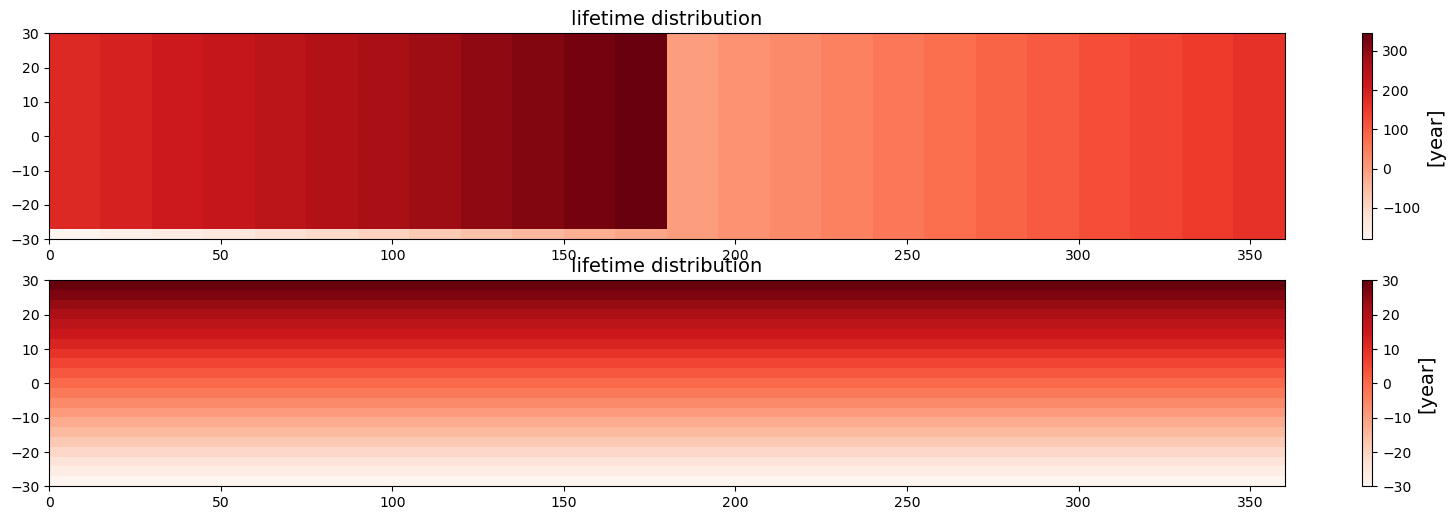

In [48]:

fig = plt.figure(figsize=(20,6), dpi=100)
extent = [0 , 360 , -30 , 30]

# Lon[iz,iy,ix,i_day,i_month,i_year]
# lifetime
ax0 = plt.subplot(2, 1, 1)

ax0_pixel = plt.imshow(Lon_new2[0,:,:,0,0,0],\
           extent = extent, cmap='Reds', interpolation='nearest')

cb0 = plt.colorbar(ax0_pixel, ax=ax0)
cb0.set_label('[year]', fontsize=14);

ax0.set_title(f"lifetime distribution", fontsize=14);
# ax0.set_title(f"Month: {i_mon+1}", fontsize=14, loc="left");


###
ax1 = plt.subplot(2, 1, 2)

ax1_pixel = plt.imshow(Lat_new2[0,:,:,0,0,0],\
           extent = extent, cmap='Reds', interpolation='nearest')

cb1 = plt.colorbar(ax1_pixel, ax=ax1)
cb1.set_label('[year]', fontsize=14);

ax1.set_title(f"lifetime distribution", fontsize=14);
# ax1.set_title(f"Month: {i_mon+1}", fontsize=14, loc="left");

In [49]:
from copy import copy

palette = copy(plt.get_cmap('Reds'))
palette.set_under('white', 1.0)  # 1.0 represents not transparent

In [50]:
# Inject_Percent_Uni[iz,:,:,i_season]*100

17.92


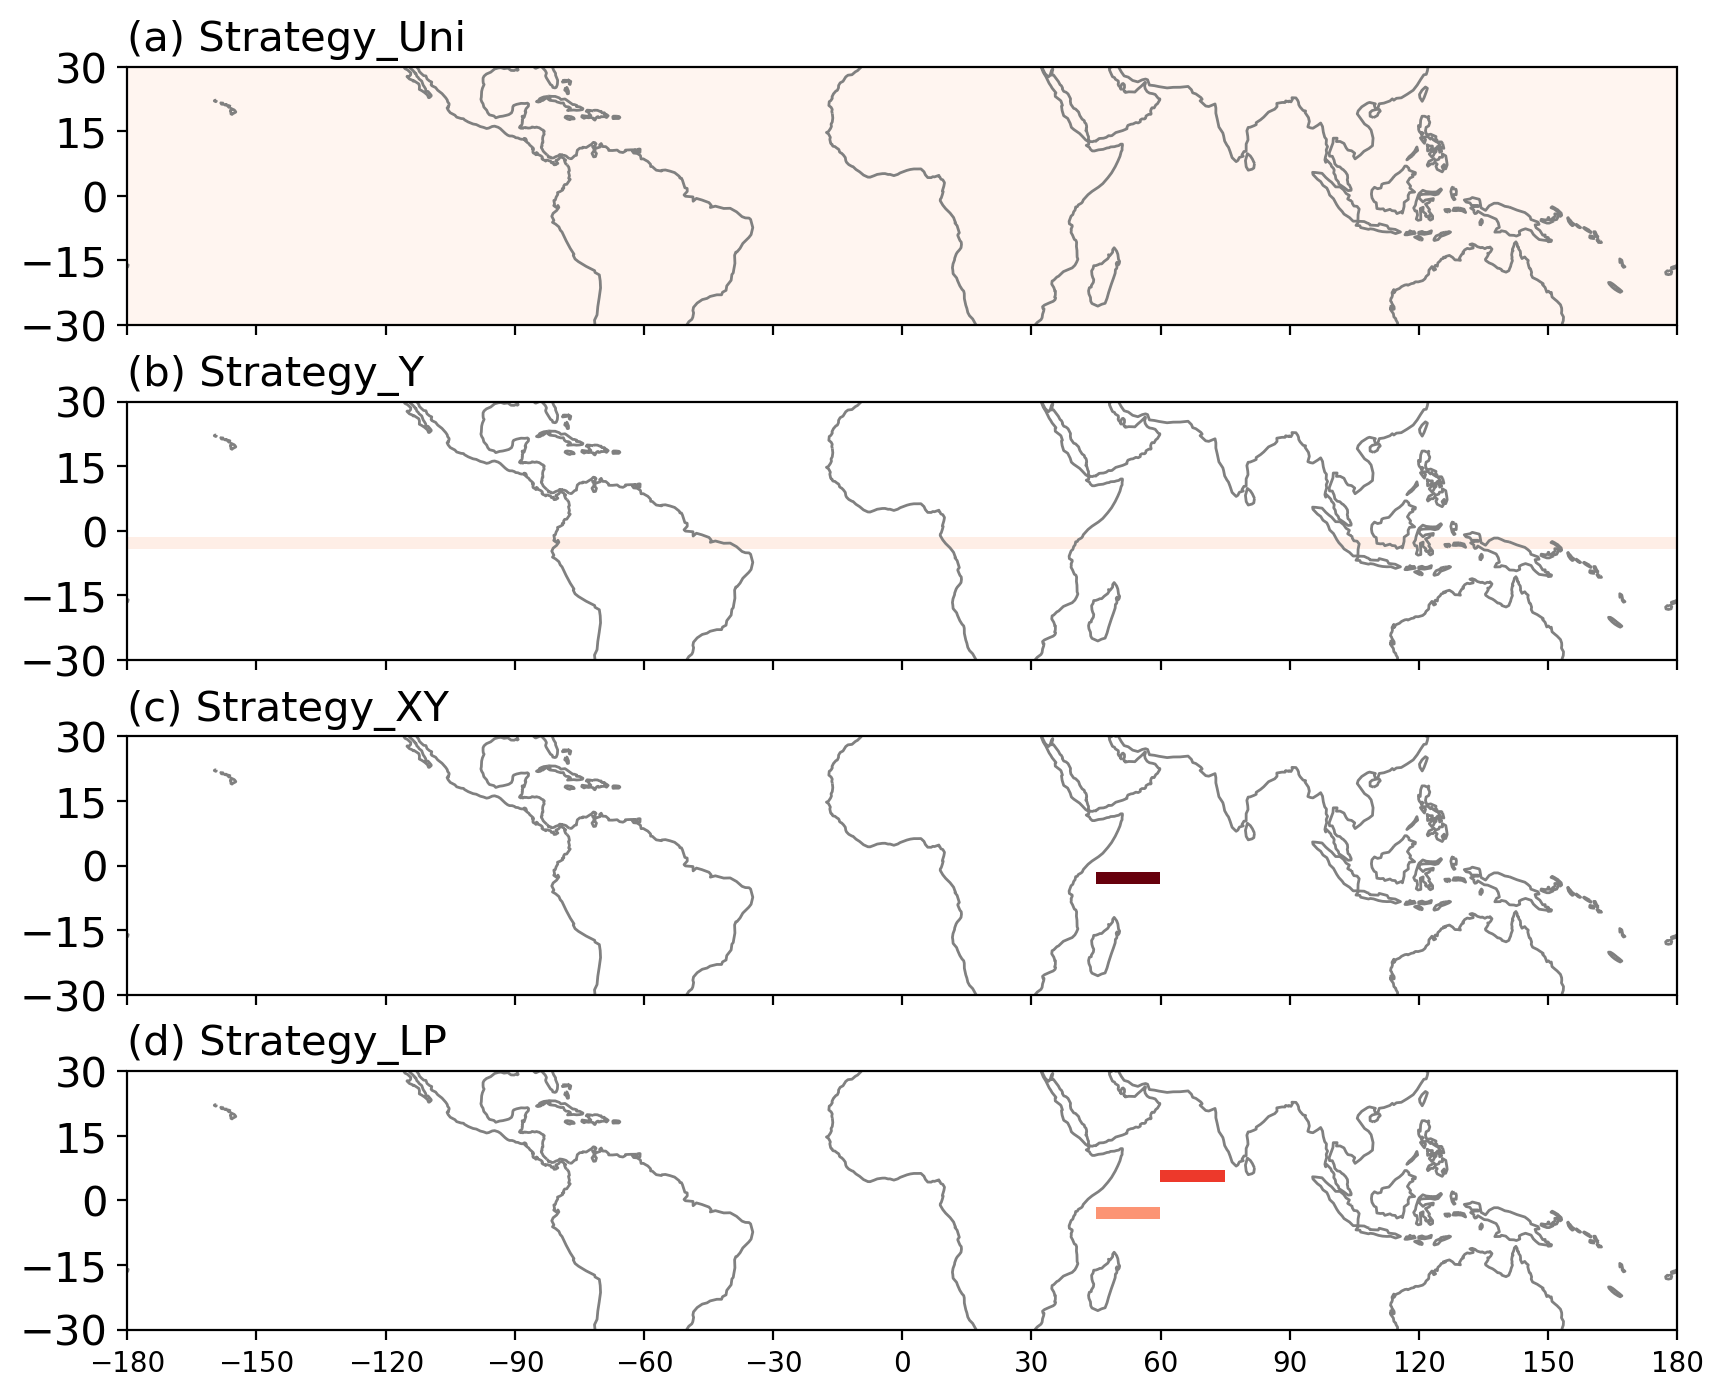

In [51]:
# Height   = [16,  18, 19, 20, 22, 24] # km

iz=1
i_season = 0
print(Height[iz])

fig = plt.figure(figsize=(10,8.5), dpi=200)
projection = crs.PlateCarree()
    
    
extent = [-180 , 180 , -30 , 30]

#-----------------------------
# Strategy_Uni
#-----------------------------
ax1 = fig.add_subplot(4,1,1, projection=projection)

ax1.set_global()
ax1.set_extent(extent, crs=projection) ## Important
ax1.add_feature(cfeature.COASTLINE, edgecolor="gray")

Inject_Percent_Uni = np.where(Inject_Percent_Uni < 1e-10, -1.0, Inject_Percent_Uni)
ax1_pixel = plt.imshow(Inject_Percent_Uni[iz,:,:,i_season], vmin=0.01, vmax=100,\
           extent = extent, cmap=palette, interpolation='nearest')

    
# cb1 = plt.colorbar(ax1_pixel, ax=ax1, extend='both', orientation = "horizontal")
# cb1.set_label('[%]', fontsize=12);

ax1.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax1.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax1.set_xticklabels([])
ax1.tick_params(axis='y', labelsize=15 )

ax1.set_title("(a) Strategy_Uni", loc='left', fontsize=15)


#-----------------------------
# Strategy_Y
#-----------------------------
ax2 = fig.add_subplot(4,1,2, projection=projection)

ax2.set_global()
ax2.set_extent(extent, crs=projection) ## Important
ax2.add_feature(cfeature.COASTLINE, edgecolor="gray")

Inject_Percent_Y = np.where(Inject_Percent_Y < 1e-10, -1.0, Inject_Percent_Y)
ax2_pixel = plt.imshow(Inject_Percent_Y[iz,:,:,i_season], vmin=0, vmax=100,\
           extent = extent, cmap=palette, interpolation='nearest')

# cb2 = plt.colorbar(ax2_pixel, extend='min', ax=ax2)
# cb2.set_label('[%]', fontsize=12);

ax2.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax2.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax2.set_xticklabels([])
ax2.tick_params(axis='y', labelsize=15 )

ax2.set_title("(b) Strategy_Y", loc='left', fontsize=15)


#-----------------------------
# Strategy_XY
#-----------------------------
ax3 = fig.add_subplot(4,1,3, projection=projection)

ax3.set_global()
ax3.set_extent(extent, crs=projection) ## Important
ax3.add_feature(cfeature.COASTLINE, edgecolor="gray")

Inject_Percent_XY = np.where(Inject_Percent_XY < 1e-10, -1.0, Inject_Percent_XY)
ax2_pixel = plt.imshow(Inject_Percent_XY[iz,:,:,i_season], vmin=0, vmax=100,\
           extent = extent, cmap=palette, interpolation='nearest')

    
# cb3 = plt.colorbar(ax3_pixel, extend='min', ax=ax3)
# cb3.set_label('[%]', fontsize=12);

ax3.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax3.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax3.set_xticklabels([])
ax3.tick_params(axis='y', labelsize=15 )

ax3.set_title("(c) Strategy_XY", loc='left', fontsize=15)


#-----------------------------
# Strategy_LP
#-----------------------------
ax4 = fig.add_subplot(4,1,4, projection=projection)

ax4.set_global()
ax4.set_extent(extent, crs=projection) ## Important
ax4.add_feature(cfeature.COASTLINE, edgecolor="gray")

Inject_Percent_LP = np.where(Inject_Percent_LP < 1e-10, -1.0, Inject_Percent_LP)
ax4_pixel = plt.imshow(Inject_Percent_LP[iz,:,:,i_season], vmin=0, vmax=100,\
           extent = extent, cmap=palette, interpolation='nearest')


ax4.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax4.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax4.tick_params(axis='y', labelsize=15 )

ax4.set_title("(d) Strategy_LP", loc='left', fontsize=15)

# cb4 = plt.colorbar(ax4_pixel, ax=ax4, extend='both', orientation = "horizontal")
# cb4.set_label('[%]', fontsize=12);

plt.show()

17.92


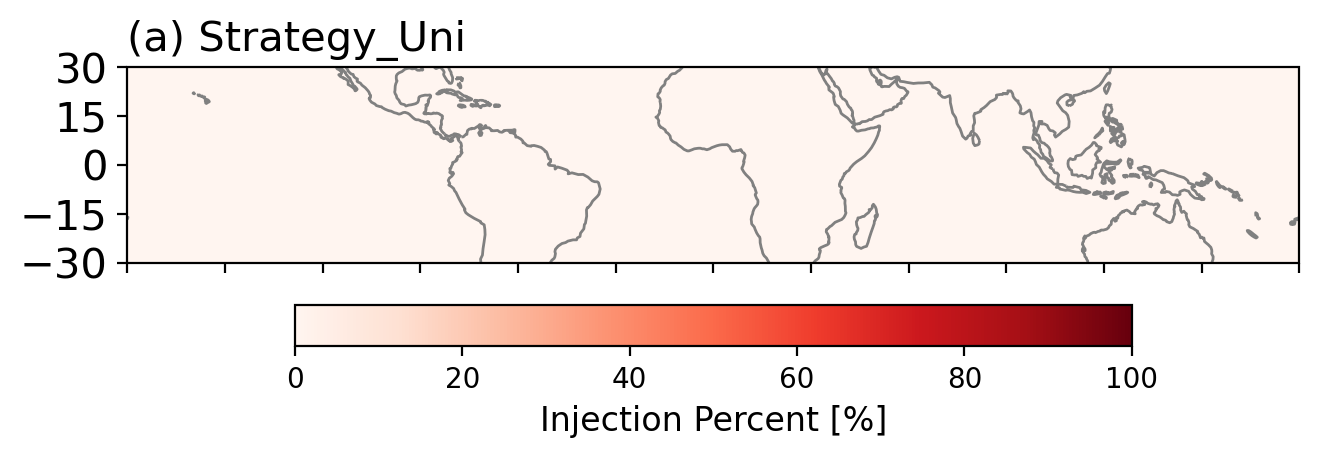

In [52]:
# Height   = [16,  18, 19, 20, 22, 24] # km

iz=1
i_season = 0
print(Height[iz])

fig = plt.figure(figsize=(10,8.5), dpi=200)
projection = crs.PlateCarree()
    
    
extent = [-180 , 180 , -30 , 30]

#-----------------------------
# Strategy_Uni
#-----------------------------
ax1 = fig.add_subplot(4,1,1, projection=projection)

ax1.set_global()
ax1.set_extent(extent, crs=projection) ## Important
ax1.add_feature(cfeature.COASTLINE, edgecolor="gray")

Inject_Percent_Uni = np.where(Inject_Percent_Uni < 1e-10, -1.0, Inject_Percent_Uni)
ax1_pixel = plt.imshow(Inject_Percent_Uni[iz,:,:,i_season], vmin=0, vmax=100,\
           extent = extent, cmap=palette, interpolation='nearest')


ax1.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax1.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax1.set_xticklabels([])
ax1.tick_params(axis='y', labelsize=15 )

# ax1.set_title("18 km", fontsize=20)
# ax1.set_ylabel("Winter", fontsize=15)
ax1.set_title("(a) Strategy_Uni", loc='left', fontsize=15)


cb1 = plt.colorbar(ax1_pixel, ax=ax1, orientation = "horizontal")
cb1.set_label('Injection Percent [%]', fontsize=12);

plt.show()